# Exposition

We are going to look at the hyperparameters for a multilayer perceptron (aka a deep neural network).  For now, we will stick to sklearn, so you can learn about the hyperparameters and how they affect the learning process.

# Tools

Import the following modules. The new classifier here is MLPClassifier:

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import make_moons, load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Exercise 1) Visualizing Estimations

### Explanation

This section re-uses the synthetic data generation and decision visualization techniques from the SVM exercise. 

A difference here is MLP does not produce a decision function. Instead, we can use the probability the soft max layer returns to generate a gradient.

Run the following code to generate the data:

In [24]:
# data generation
# make_moons is a functon that generates random data in a moon shape.
# make_moons generates two classes (labeled 0 and 1)
np.random.seed(1337)
features, labels = make_moons(n_samples=10000, noise=0.1)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

# makes a training DataFrame
# I do this because it is easier to plot as a dataframe
feature_names = ["feat_1", "feat_2"]
train_df = pd.DataFrame(train_features,
                        columns=feature_names)
train_df["label"] = train_labels

# you will need to plot the test label later
feature_names = ["feat_1", "feat_2"]
test_df = pd.DataFrame(test_features,
                       columns=feature_names)
test_df["label"] = test_labels

Run the following code to plot it. You will want to take notice of this code, as it will be useful for making your plots later on.

In [25]:
set(train_labels)

{0, 1}

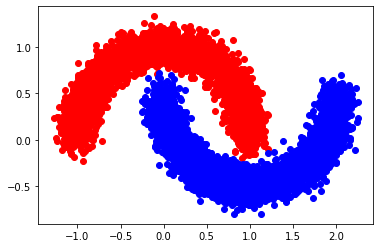

In [26]:
# plot each class separately.
# We are colouring the 0 class red and the 1 class blue.
colors=["red", "blue"]
plt.figure()
for label in set(train_labels):
    cluster_df = train_df.loc[train_df.label==label, feature_names]
    plt.scatter(cluster_df[feature_names[0]],
                cluster_df[feature_names[1]],
                color=colors[label])
plt.show()


Again, this is the function you can use to plot the decision of the classifier. It has been modified to work with the MLPClassifier. It works similar to how it did in the SVM example.

In [27]:
# run this code block to include this function
def add_decision_boundary_to_plot(classifier, min_x, max_x, min_y, max_y):
    """
    Call this after you have started a plot but before you call plt.show()
    
    classifier - a trained model that you want to visualize
    min_x - the minimum x value of the x axis
    max_x - the maximum x value of the x axis
    min_y - the minimum y value of the y axis
    max_y - the maximum y value of the y axis 
    """
    h = 0.1
    xx, yy = np.meshgrid(np.arange(min_x, max_x, h),
                         np.arange(min_y, max_y, h))
    hyperplane = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    hyperplane = hyperplane.reshape(xx.shape)
    plt.contourf(xx, yy, hyperplane, cmap=plt.cm.RdBu, alpha=.8)
    plt.show()


### Sub-Tasks

Like in the SVM Exercise, you should do the following:

1) Train a MLPClassifier with default parameters on the training data set (make sure you don't include the labels in your features!).

2) Predict on the test data and print a classification_report.

3) Plot the test data (like a scatter plot, you can borrow the code above) along with the decision boundary (call the add_decision_boundary_to_plot function).

The default parameters should work well for this data, but you should still be able to see the decision boundary changes when you change the parameters. In particular, try modifying the model structure (first argument) and observe how that affects the decision boundary. What set of parameters best separates the data?


In [28]:
## your code goes here:

model = MLPClassifier()


In [29]:
model.fit(train_features,train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [30]:
mlp_pred = model.predict(test_features)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [32]:
print(f"The accuracy score of the MLP Classifier is: {accuracy_score(test_labels,mlp_pred)}")
print(f"The precision score of the MLP Classifier is: {precision_score(test_labels,mlp_pred)}")
print(f"The recall score of the MLP Classifier is: {recall_score(test_labels,mlp_pred)} \n \n")

print(classification_report(test_labels,mlp_pred))

The accuracy score of the MLP Classifier is: 0.9993333333333333
The precision score of the MLP Classifier is: 0.998638529611981
The recall score of the MLP Classifier is: 1.0 
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1533
           1       1.00      1.00      1.00      1467

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



array([1, 0, 0, ..., 0, 1, 0])

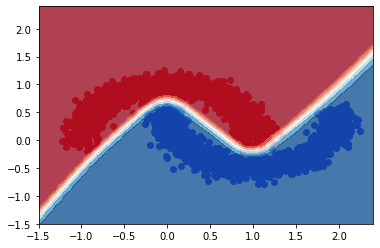

In [34]:
colors=["red", "blue"]
plt.figure()
for label in set(test_labels):
    cluster_df = test_df.loc[test_df.label==label, feature_names]
    plt.scatter(cluster_df[feature_names[0]],
                cluster_df[feature_names[1]],
                color=colors[label])
add_decision_boundary_to_plot(model, -1.5, 2.5, -1.5, 2.5)
plt.show()

# Exercise 2)  Parameter tuning on hand-written digits

For this task, you will be classifying images of hand drawn digits. This is the same dataset as we used in the Nearest Neighbours task in Module 3. The point of this task is to try parameter tuning on a real task

First we will load the dataset and take a look at it. After running the following code you will have a dataframe digit_data_df that contains the images and digit_labels that contains the labels (what digit the image is of). A description of the dataset will be printed that you can read:


In [14]:
digits = load_digits()
digit_data_df = pd.DataFrame(digits["data"])
digit_labels = pd.Series(digits["target"])
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

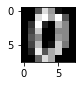

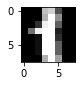

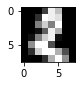

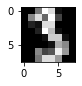

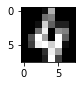

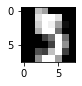

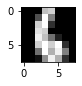

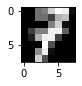

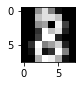

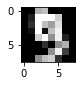

In [15]:
# run this to see what the data looks like
for i in range(10):
    plt.figure(figsize=(1,1))
    plt.gray()
    plt.imshow(digits["images"][i])
    plt.show()

### Sub-Tasks

Below you wil find a cross-validated experiment testing a MLP on the hand-written digit dataset. Given are the default parameters for the MLPClassifier. Try to find a parameter set that optimizes your performance.

I managed to get 98.497% accuracy. That is not the global optimal.

In [47]:
# the experiment
np.random.seed(1337)
total_labels = []
total_preds = []

skf = StratifiedKFold(n_splits=5, shuffle=True)
for train_indices, test_indices in skf.split(digit_data_df, digit_labels):
    train_digits = digit_data_df.iloc[train_indices, :]
    train_labels = digit_labels.iloc[train_indices]

    test_digits = digit_data_df.iloc[test_indices, :]
    test_labels = digit_labels.iloc[test_indices]
    my_mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                           activation="logistic",
                           solver="adam",
                           alpha=0.00001,
                           batch_size="auto",
                           learning_rate="constant",
                           learning_rate_init=0.001,
                           power_t=0.5,
                           max_iter=200,
                           shuffle=True,
                           random_state=None,
                           tol=0.0001,
                           verbose=False,
                           warm_start=False,
                           momentum=0.9,
                           nesterovs_momentum=True,
                           early_stopping=False,
                           validation_fraction=0.1,
                           beta_1=0.9,
                           beta_2=0.999,
                           epsilon=1e-08)
    my_mlp = my_mlp.fit(train_digits, train_labels)

    total_preds.extend(my_mlp.predict(test_digits))
    total_labels.extend(test_labels)
print(classification_report(total_labels, total_preds))
print(accuracy_score(total_labels, total_preds))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.96      0.99      0.97       182
           2       0.99      1.00      1.00       177
           3       0.99      0.98      0.99       183
           4       0.99      0.97      0.98       181
           5       0.97      0.98      0.98       182
           6       0.99      0.98      0.99       181
           7       0.99      0.98      0.99       179
           8       0.95      0.95      0.95       174
           9       0.97      0.97      0.97       180

    accuracy                           0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98      0.98      0.98      1797

0.9810795770728993


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
#identity gave me 96%????